<h1><b>MACHINE LEARNING AND STATISTICS: REGRESSION</b></h1>

<h2>GOALS OF THIS PROJECT</h2>
    <ol>
    <li>Show how scipy can be used to perform linear regression.</li>
    <li>Find an appropriate data set online or elsewhere on which to
perform linear regression.
</li>
    <li>Demonstrate how to perform linear regression on the data set.
</li>
</ol>

<h2 align = "center">1. PERFORMING LINEAR REGRESSION WITH SCIPY</h2>

<h3>WHAT IS LINEAR REGRESSION</h3>
<p>Linear regression is a commonly used type of predicitive analysis. It attempts to examine two things.
    <ol>
        <li>Whether a set of predictor variables can predict the outcome/dependent variable. For example predicting the weight of a mouse based on its size.</li>
        <li>Which variables in particular are significant predictors of the outcome variable. For example, a mouse's tail length may not be significant in predicting is size or weight.</li>

In [126]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as ss

import pandas as pd

rng = np.random.default_rng()

In [127]:
x = rng.random(10)

y = 1.6*x + rng.random(10)

In [128]:
res = ss.linregress(x, y)

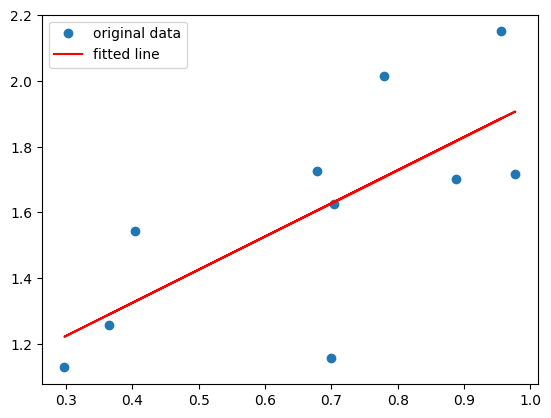

In [129]:
plt.plot(x, y, 'o', label='original data')

plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

plt.legend()

plt.show()

<h2 align = "center">2. EXPLAINING THE DATA SET USED</h2>

In [130]:
df = pd.read_csv('Fish.csv')

df

,Species,Weight,Length_Vert,Length_Diag,Length_Cross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [131]:
def dfregression(x,y):
    res = ss.linregress(x, y)

    plt.plot(x, y, 'o', label='original data')

    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

    plt.legend()

    plt.show()

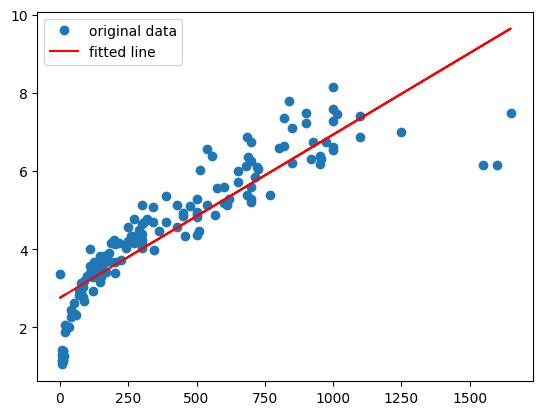

In [132]:
dfregression(df['Weight'], df['Width'])

In [133]:
grouped = df.groupby(df.Species, as_index=False)
dfBream = grouped.get_group('Bream').reset_index()
dfRoach = grouped.get_group('Roach').reset_index()
dfWhitefish = grouped.get_group('Whitefish').reset_index()
dfParkki = grouped.get_group('Parkki').reset_index()
dfPerch = grouped.get_group('Perch').reset_index()
dfPike = grouped.get_group('Pike').reset_index()
dfSmelt = grouped.get_group('Smelt').reset_index()

<h2 align = "center">3. PERFORMING LINEAR REGRESSION THE DATA SET</h2>

In [134]:
#Function to Calculate Linear Regression.
def gradient_descent(m_now, b_now, points, L):
    
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    #Loop determines gradient of line iteratively
    for i in range(n):
        x = points.iloc[i].Weight
        y = points.iloc[i].Height
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [137]:
m, b, L, epochs = 3, 3, 0.000001, 10

for i in range(epochs):
    m, b = gradient_descent(m, b, df, L)

print(m, b)

0.012799312593060526 2.9958621092510556


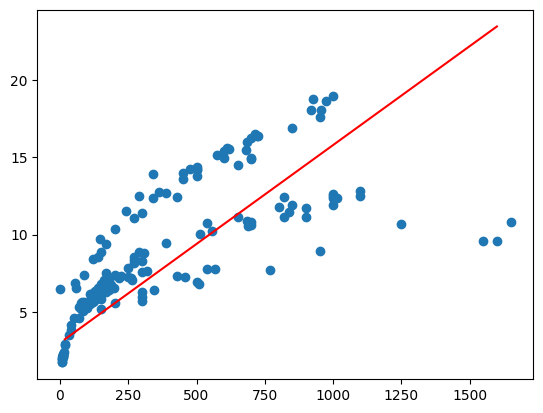

In [138]:
plt.scatter(df.Weight, df.Height)
plt.plot(list(range(18,1600)), [m* x + b for x in range(18,1600)],color = "red")